In [45]:
import pandas as pd
from utils import load_and_prepare_building_dfs
import matplotlib.pyplot as plt
import datetime
from dtaidistance import dtw

building_dfs = load_and_prepare_building_dfs(esave_path="data/EsaveExport_Trondheim Kommune_Trondheim_10121314.xls", vis_path='data/VIS Målere.xlsx')

anomalies = pd.read_excel('data/anomaly_confidence.xlsx', decimal=',')
anomalies.rename(columns={anomalies.columns[0]: 'datetime'}, inplace=True)
anomalies['datetime'] = pd.to_datetime(anomalies['datetime'], dayfirst=True)
anomalies.set_index('datetime', inplace=True)
anomalies.sort_index()

anomalies

Data loaded in 82.00198078155518 seconds


,Trondheim Kommune - General Wibes veg 1,Trondheim Kommune - Spongdal skole og Byneshallen,Trondheim Kommune - Ladesletta helse- og velferdssenter,Trondheim Kommune - Leangen Ishall,Trondheim Kommune - Åsveien skole og Åsveihallen,Trondheim Kommune - Spongdal skole,Trondheim Kommune - Trondheim Hovedbrannstasjon (Sluppen),Trondheim Kommune - Stavset bskole,Trondheim Kommune - Brøset Interim skole,Trondheim Kommune - Lilleby skole,...,Trondheim Kommune - Charlottenlund barnehage,Trondheim Kommune - Cecilienborg barnehage,Trondheim Kommune - Brøset Prestekragen barnehage,Trondheim Kommune - Brøset Marikåpa barnehage,Trondheim Kommune - Bromstad barnehage,Trondheim Kommune - Brinken barnehage,Trondheim Kommune - Breidablikk barnehage,Trondheim Kommune - Brannhaugen Barnehage,Trondheim Kommune - Blomsterbyen barnehage,Trondheim Kommune - Angelltrøa barnehage
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.06,0.07,0.41,0.00,0.02,0.07,0.19,0.25,0.08,0.09,...,0.01,0.32,0.16,0.04,0.02,0.02,0.06,0.08,0.02,0.05
2015-01-02,0.09,0.06,0.55,0.03,0.02,0.06,0.10,0.24,0.04,0.06,...,0.02,0.36,0.02,0.03,0.01,0.02,0.02,0.08,0.02,0.03
2015-01-03,0.15,0.08,0.67,0.04,0.03,0.08,0.13,0.11,0.02,0.12,...,0.00,0.43,0.00,0.00,0.02,0.02,0.01,0.04,0.01,0.03
2015-01-04,0.07,0.07,0.36,0.01,0.01,0.07,0.09,0.27,0.22,0.14,...,0.05,0.45,0.00,0.00,0.02,0.02,0.05,0.06,0.01,0.02
2015-01-05,0.02,0.03,0.09,0.07,0.00,0.03,0.04,0.37,0.58,0.00,...,0.09,0.09,0.04,0.00,0.01,0.03,0.09,0.04,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,0.02,0.23,0.05,0.03,0.01,0.23,0.51,0.16,0.00,0.04,...,0.04,0.09,0.00,0.00,0.00,0.02,0.00,0.06,0.03,0.01
2019-12-29,0.00,0.17,0.01,0.05,0.02,0.17,0.05,0.15,0.02,0.03,...,0.05,0.03,0.06,0.02,0.01,0.03,0.18,0.11,0.08,0.01
2019-12-30,0.01,0.18,0.08,0.02,0.03,0.18,0.01,0.16,0.04,0.01,...,0.04,0.04,0.06,0.08,0.03,0.07,0.39,0.15,0.08,0.03


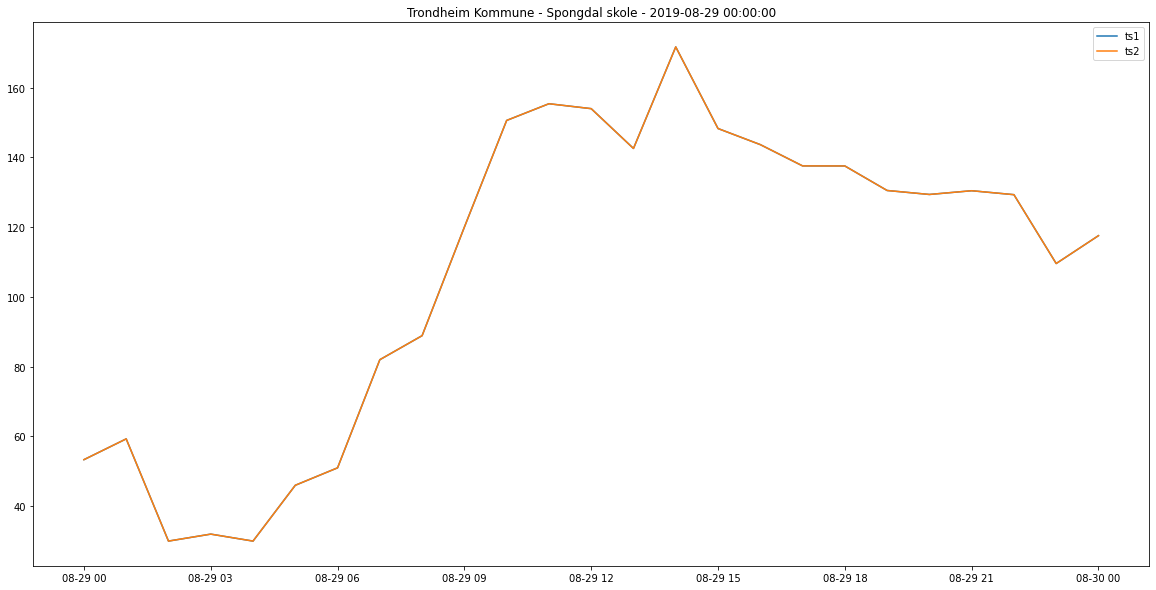

start: 2019-08-29 00:00:00 	 end: 2019-08-30 00:00:00 	 distance: 0.0


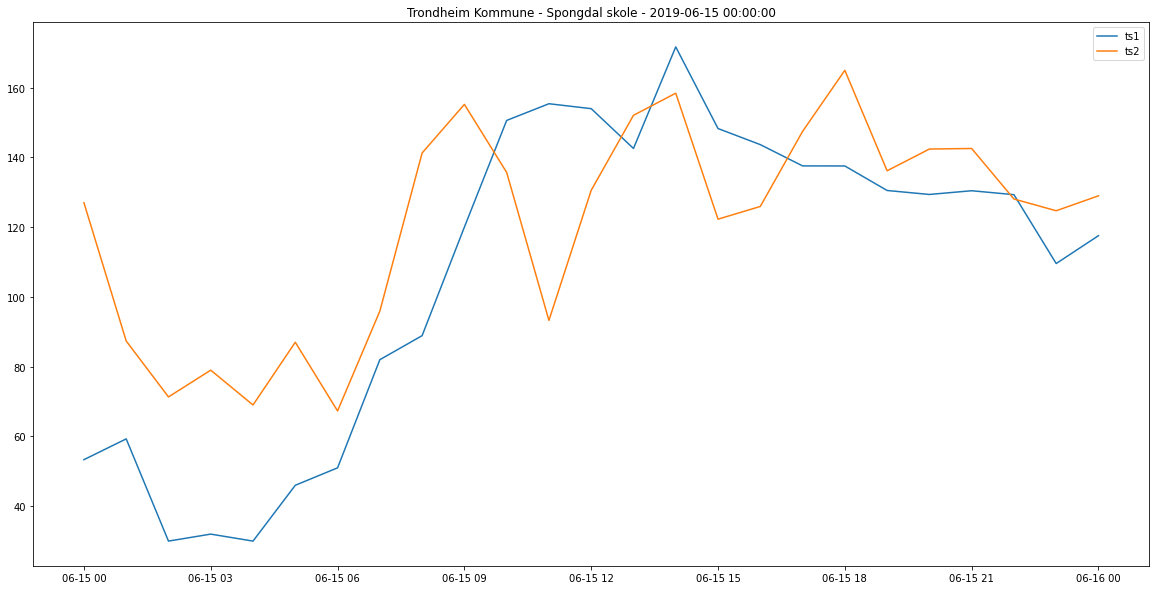

start: 2019-06-15 00:00:00 	 end: 2019-06-16 00:00:00 	 distance: 128.16489417933448


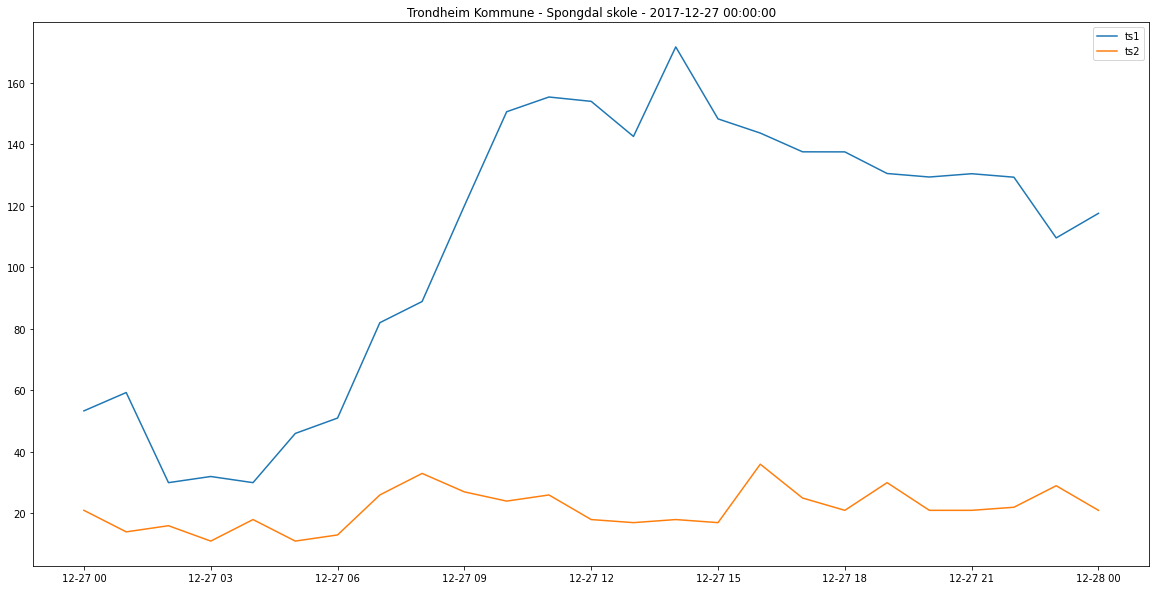

start: 2017-12-27 00:00:00 	 end: 2017-12-28 00:00:00 	 distance: 446.9690510538733


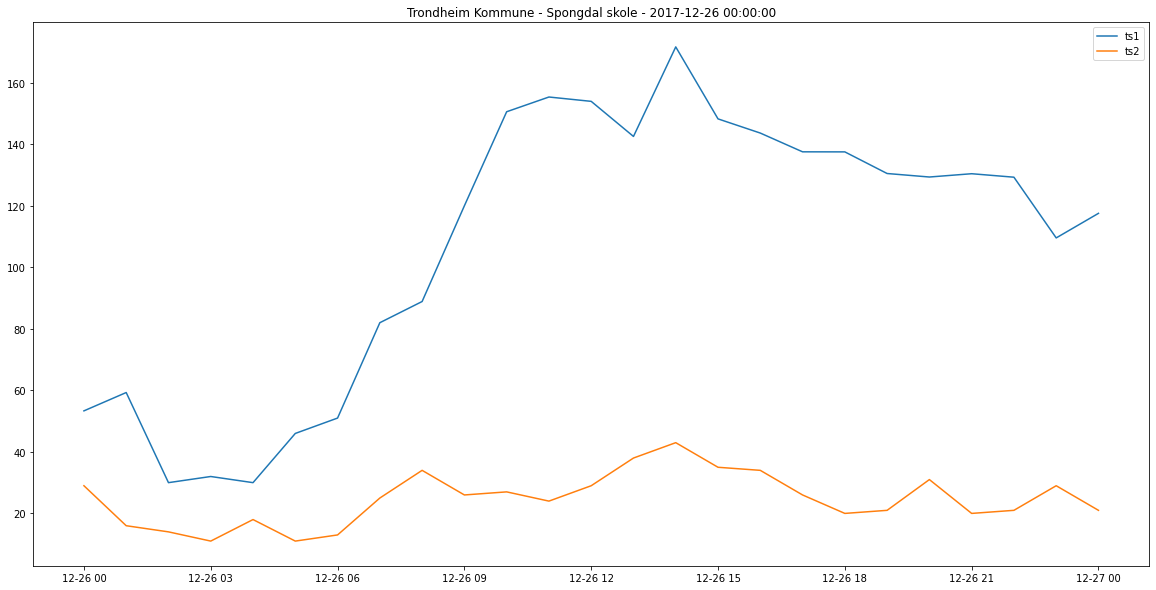

start: 2017-12-26 00:00:00 	 end: 2017-12-27 00:00:00 	 distance: 434.0628210293989


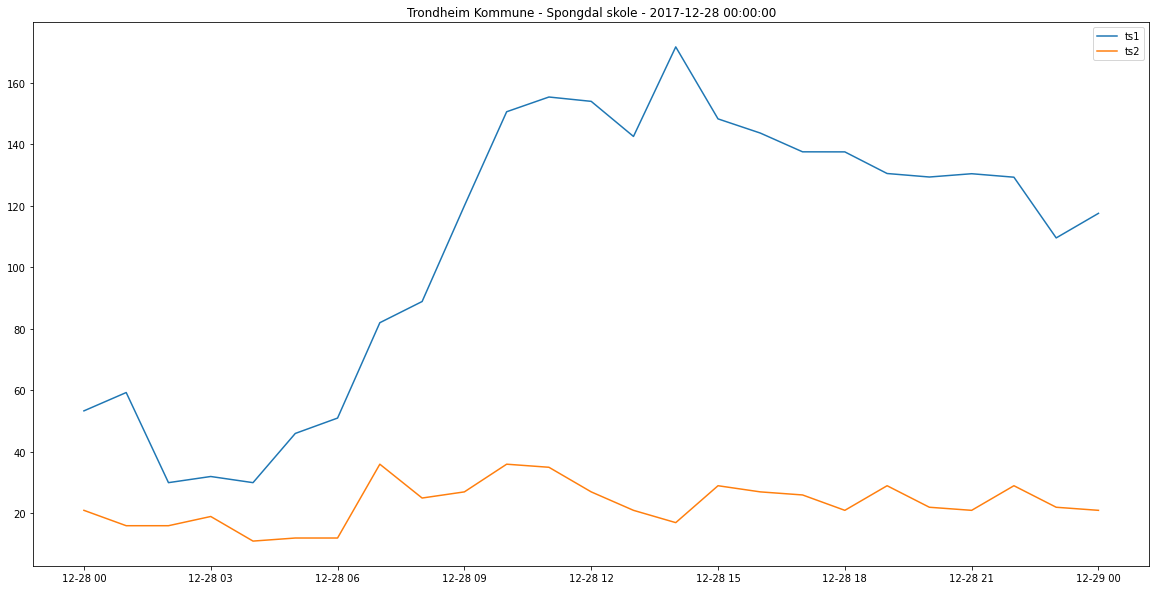

start: 2017-12-28 00:00:00 	 end: 2017-12-29 00:00:00 	 distance: 456.4853914420483


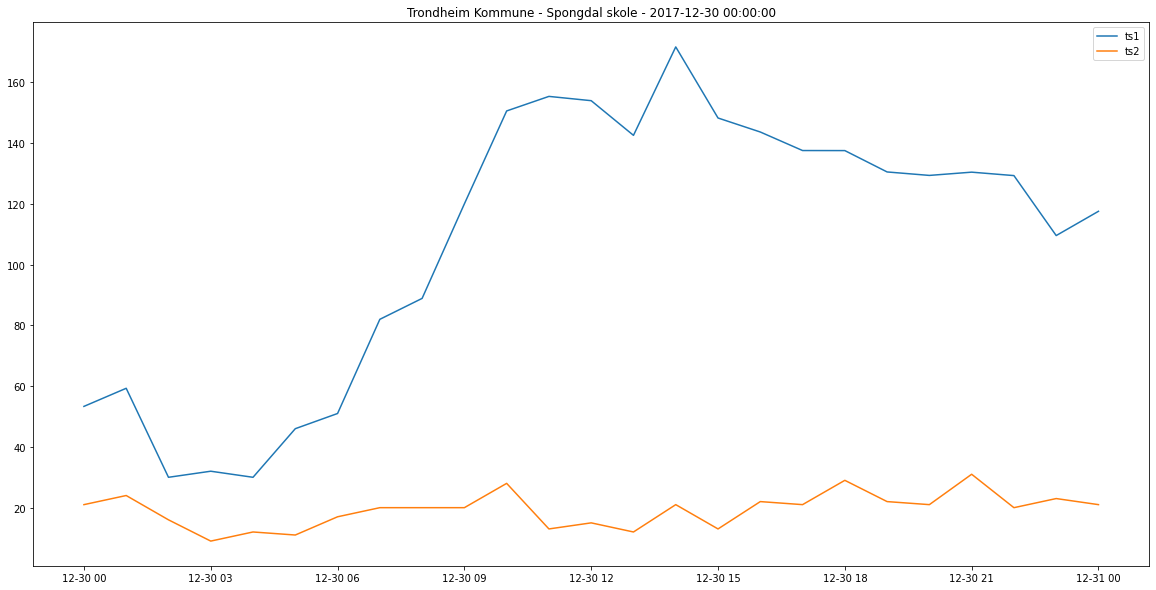

start: 2017-12-30 00:00:00 	 end: 2017-12-31 00:00:00 	 distance: 452.3271742887


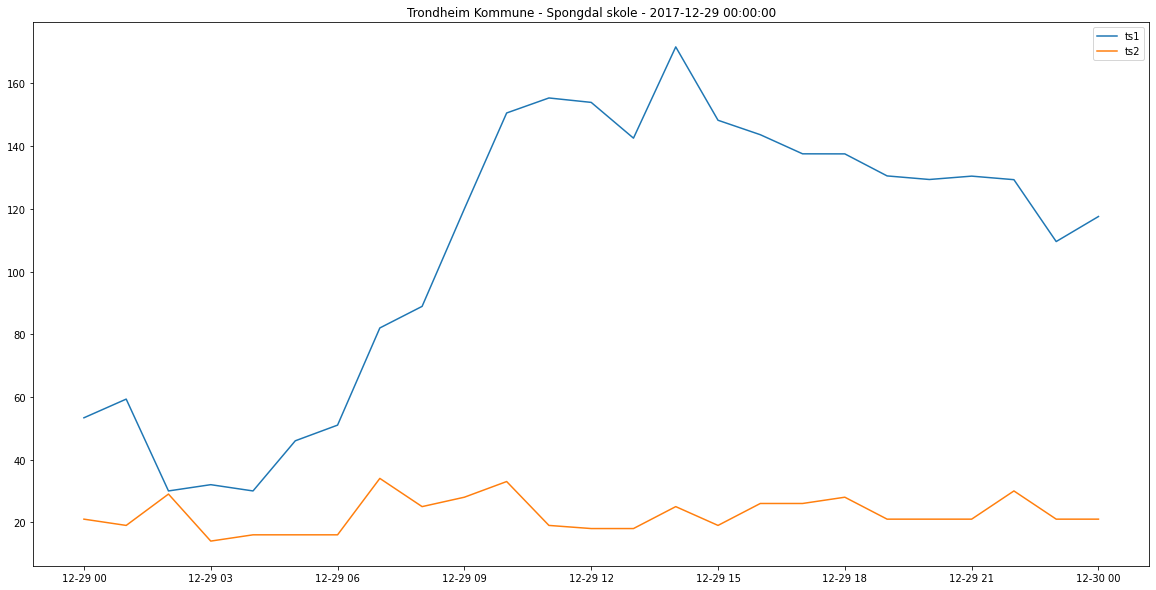

start: 2017-12-29 00:00:00 	 end: 2017-12-30 00:00:00 	 distance: 452.584348602556


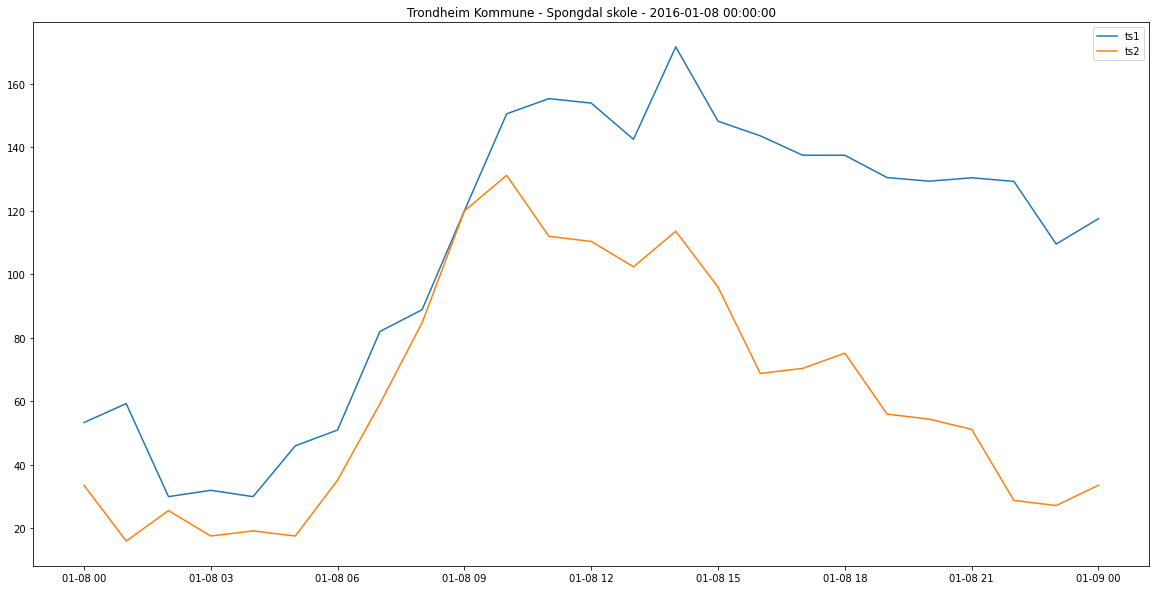

start: 2016-01-08 00:00:00 	 end: 2016-01-09 00:00:00 	 distance: 200.0236970961191


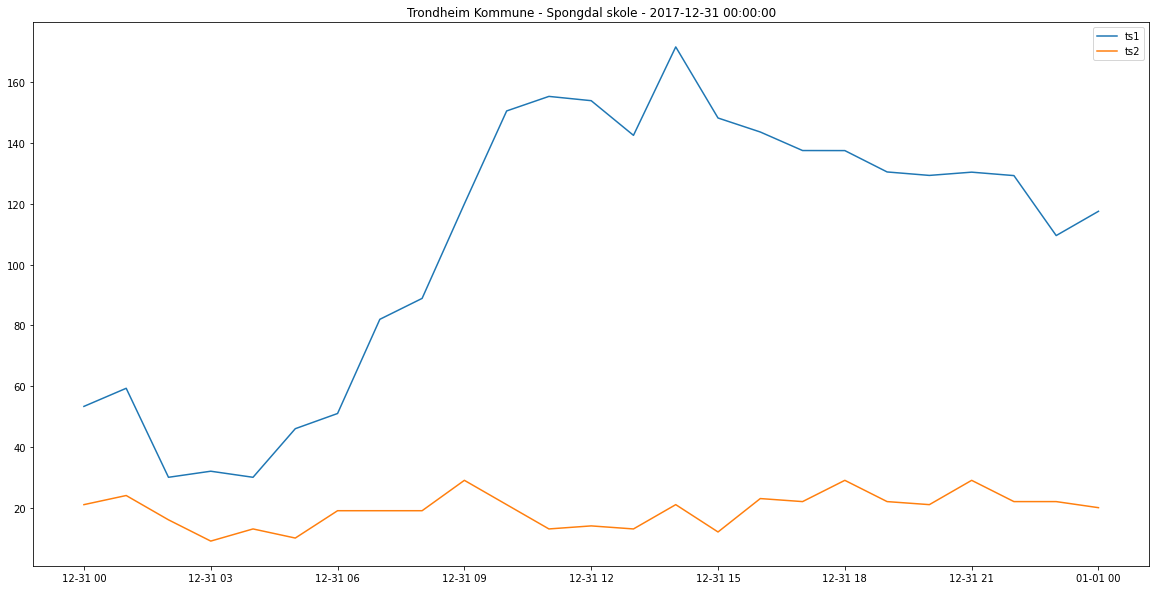

start: 2017-12-31 00:00:00 	 end: 2018-01-01 00:00:00 	 distance: 459.2968240691416


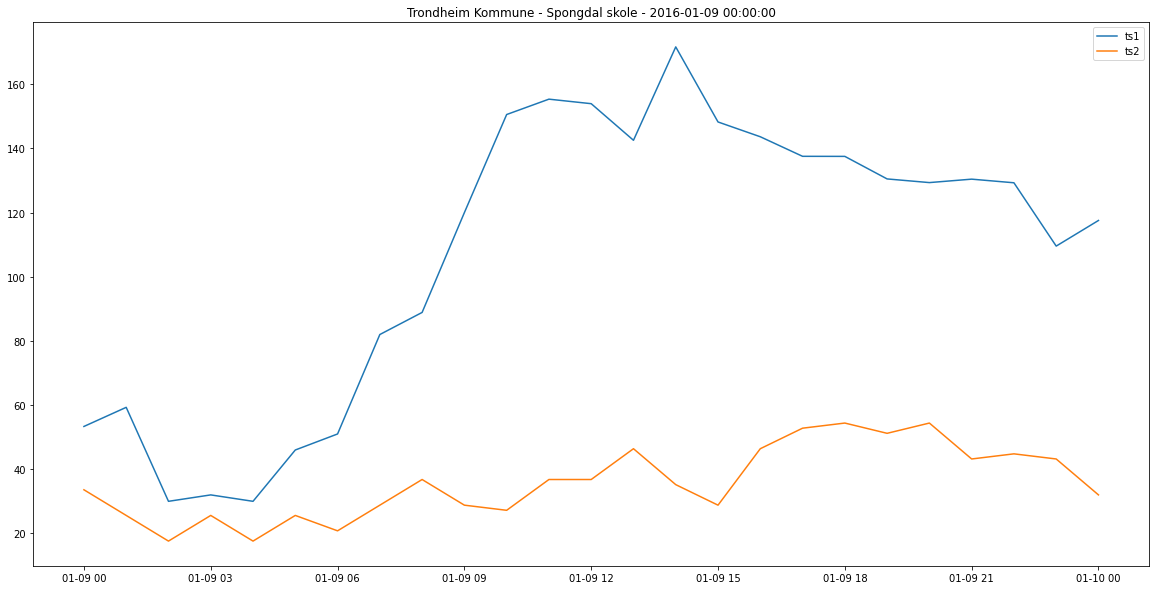

start: 2016-01-09 00:00:00 	 end: 2016-01-10 00:00:00 	 distance: 357.04316349707636


In [46]:
building = list(building_dfs.keys())[5]
example_building = anomalies[building].copy()
example_building.sort_values(ascending=False, inplace=True)
#print(example_building)
# get 10 most anomalous times
most_deviated_days = example_building.index[:10]
# plot all 24 hours of each 10 days

dt_start = datetime.datetime.combine(example_building.index[0], datetime.time.min)
dt_end = dt_start + datetime.timedelta(days=1)
dr = pd.date_range(dt_start, dt_end, freq='H')
ts1 = building_dfs[building]["Totalt"].loc[dr]

for day in most_deviated_days:
    dt_start = datetime.datetime.combine(day, datetime.time.min)
    dt_end = dt_start + datetime.timedelta(days=1)
    
    dr = pd.date_range(dt_start, dt_end, freq='H')
    ts2 = building_dfs[building]["Totalt"].loc[dr]
    # plot ts1 and ts2. let ts1 have same time index as ts2
    # increase plot size
    plt.figure(figsize=(20, 10))
    plt.plot(ts2.index ,ts1.values, label='ts1')
    plt.plot(ts2, label='ts2')
    plt.legend()
    plt.title(f"{building} - {day}")

    distance = dtw.distance(ts1, ts2)
    plt.show()
    print(f"start: {dt_start} \t end: {dt_end} \t distance: {distance}")

Trondheim Kommune - Munkvollhallen                   366.37
Trondheim Kommune - Stavset bskole                   336.88
Trondheim Kommune - Ilsvika barnehage                276.98
Trondheim Kommune - Haukåsen barnehage               216.18
Trondheim Kommune - Persaunet barnehage              193.21
                                                      ...  
Trondheim Kommune - Moltmyra Barnehage                13.33
Trondheim Kommune - Buran helse og Velferdssenter     12.69
Trondheim Kommune - Kattem barnehager                  8.52
Trondheim Kommune - Krinkelkroken Barnehage            7.08
Trondheim Kommune - Festningen barnehage               3.00
Length: 209, dtype: float64
datetime
2016-01-09    47.25
2016-01-08    45.05
2016-01-15    34.38
2018-02-03    32.75
2018-12-14    32.23
              ...  
2017-08-19     3.02
2017-08-05     3.02
2017-07-21     2.97
2017-07-15     2.75
2018-06-16     2.50
Length: 1827, dtype: float64


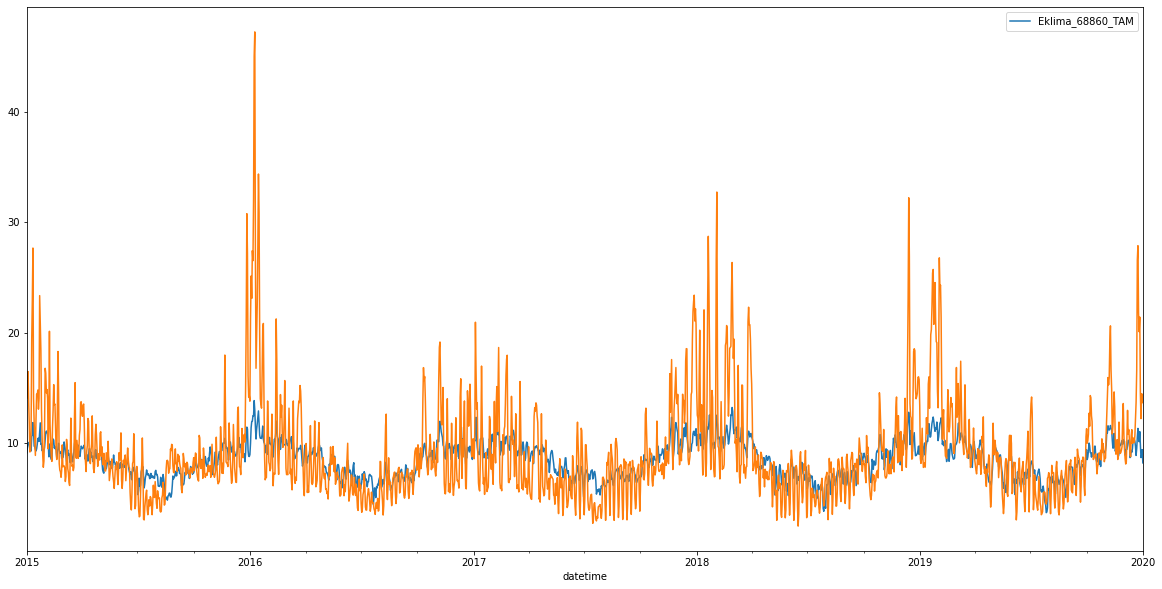

In [53]:
# temperatures from voll
temp_voll = pd.read_excel('data/Volltemp.xlsx', decimal=',')
temp_voll.rename(columns={temp_voll.columns[0]: 'datetime'}, inplace=True)
temp_voll['datetime'] = pd.to_datetime(temp_voll['datetime'], dayfirst=True)
temp_voll.set_index('datetime', inplace=True)
temp_voll.sort_index()
temp_voll = - temp_voll.resample('D').sum() * 0.01 + 10 # negative to align with anomalies
temp_voll.plot()

most_abnormal_buildings = anomalies.sum()
most_abnormal_buildings.sort_values(ascending=False, inplace=True)
print(most_abnormal_buildings)

# sum daily anomaly confidence
total_daily_anomaly = anomalies.sum(axis=1)

# increase plot size
total_daily_anomaly.plot(figsize=(20, 10))
total_daily_anomaly.sort_values(ascending=False, inplace=True)
print(total_daily_anomaly)
plt.show()